# Data collection

In [ ]:
!wget -q https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip

In [ ]:
!unzip /content/image_data.zip

# Dataset preparation

In [ ]:
main_folder = "image_data/data/"
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
class_names = os.listdir(main_folder)
class_names

['horses', 'dogs', 'Humans']

In [ ]:
x = []
y = []
for folder in class_names:
  image_list = os.listdir(main_folder+folder)
  for img_name in image_list:
    img = image.load_img(main_folder+folder+"/"+img_name,target_size=(200,200))
    img = image.img_to_array(img)
    x.append(img)
    y.append(class_names.index(folder))

In [ ]:
x = np.array(x)
x = x/255
x.shape

(606, 200, 200, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
y.shape

(606, 3)

In [ ]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,random_state=5)

# Modelling without transfer learning

In [ ]:
from tensorflow.keras import models,layers
model = models.Sequential()

model.add(layers.Conv2D(12,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(layers.Conv2D(20,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(30,(3,3),activation='relu'))
model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(50,(3,3),activation='relu'))
model.add(layers.Conv2D(60,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(3,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtr,ytr,verbose=True,epochs=20,batch_size=32,validation_data=(xts,yts))

Epoch 1/20
16/16 [==============================] - 1s 72ms/step - loss: 1.1015 - accuracy: 0.3347 - val_loss: 1.0839 - val_accuracy: 0.6148
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0045 - accuracy: 0.5124 - val_loss: 0.8062 - val_accuracy: 0.7131
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8385 - accuracy: 0.6653 - val_loss: 0.8454 - val_accuracy: 0.6803
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.7381 - accuracy: 0.7107 - val_loss: 0.7926 - val_accuracy: 0.7213
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5928 - accuracy: 0.7748 - val_loss: 0.6719 - val_accuracy: 0.7541
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4585 - accuracy: 0.8285 - val_loss: 0.8287 - val_accuracy: 0.7295
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.3527 - accuracy: 0.8616 - val_loss: 0.9531 - val_accuracy: 0.6885
Epoch 8/20
16

# Transfer learning with ResNet

In [ ]:
from tensorflow.keras.applications import resnet50
model2 = resnet50.ResNet50(weights='imagenet')
model2.summary()

In [ ]:
from tensorflow.keras import models,layers
input_layer = layers.Input(shape=(200,200,3))
model2 = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
model2.summary()

In [ ]:
last_layer = model2.output
# last_layer = model2.layers[-1]
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(3,activation='softmax')(flatten)
new_model = models.Model(inputs=input_layer,outputs=output_layer)
new_model.summary()

In [ ]:
# Freeze all layers except the last layer
for layer in new_model.layers[:-1]:
  layer.trainable=False
new_model.summary()

In [ ]:
x = []
y = []
for folder in class_names:
  image_list = os.listdir(main_folder+folder)
  for img_name in image_list:
    img = image.load_img(main_folder+folder+"/"+img_name,target_size=(200,200))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(img)
    x.append(img)
    y.append(class_names.index(folder))

In [ ]:
x = np.array(x)
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,random_state=5)



In [ ]:
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
new_model.fit(xtr,ytr,verbose=True,epochs=10,batch_size=32,validation_data=(xts,yts))

In [ ]:
def predict(img_name):
  img = image.load_img(img_name,target_size=(200,200))
  img = image.img_to_array(img)
  plt.imshow(img.astype('int32'))
  plt.show()
  img = resnet50.preprocess_input(img)
  prediction = new_model.predict(img.reshape(1,200,200,3))
  prediction = np.argmax(prediction)
  print(class_names[prediction])

In [ ]:
!wget -q https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/dog_cool_summer_slideshow/1800x1200_dog_cool_summer_other.jpg


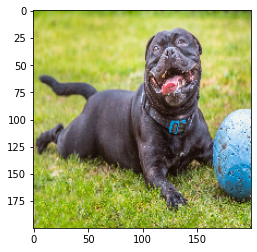

dogs


In [ ]:

predict("1800x1200_dog_cool_summer_other.jpg")